In [1]:
import numpy as np
import pandas as pd

In [2]:
# loading loan data
df=pd.read_csv("/Users/anandjha/Desktop/IBM/Submission_Lending_Club_Case_Study/data/loan.csv")

# Display the first few rows of the dataframe
df.head()

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/2111243727.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/Users/anandjha/Desktop/IBM/Submission_Lending_Club_Case_Study/data/loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Printing list of columns
df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [4]:
# Calculate the percentage of null values for each column
null_percentage = df.isnull().mean() * 100
null_percentage

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [5]:
# Identify columns with more than 50% null values
columns_to_drop = null_percentage[null_percentage > 50].index
columns_to_drop

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [6]:
# Drop columns with more then 50% null values from the DataFrame
df = df.drop(columns=columns_to_drop)
columns_to_drop

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [7]:
# printing data fraome
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [8]:
# Checking null value % gain
null_percentage = df.isnull().mean() * 100
null_percentage

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [9]:
# checking desc column if its usefull for analysis
df.desc                     

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                                      NaN
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 39717, dtype: object

In [10]:
# As 'desc' is not required for data analysis. I am dropping it.
df = df.drop(columns=['desc'])
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [11]:
# The colum 'emp_title' has 6% null values. Replacing the null values with 'unknown'
df['emp_title'].fillna('Unknown', inplace=True)

In [12]:
# Checking null value percentage again
null_percentage = df.isnull().mean() * 100
null_percentage

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.000000
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [13]:
# Printing 'emp_length' column
df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [14]:
# The colum 'emp_length' has 2.7% null values. Replacing the null values with 'unknown''
df.emp_length.fillna('Unknown', inplace=True)

In [15]:
# Checking null value percentage again
null_percentage = df.isnull().mean() * 100
null_percentage

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [16]:
# The colum 'title' has null values. Replacing the null values with 'unknown''
df.title.fillna('Unknown', inplace=True)

In [17]:
# Removing % in 'revol_util' column and converting the data type to float
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float')

In [18]:
# replacing null values with median
df.revol_util.fillna(df['revol_util'].median(), inplace=True)

In [19]:
# conerting column 'last_pymnt_d' to date
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%d')

In [20]:
# replacing null values in 'last_pymnt_d' to median value
df.last_pymnt_d.fillna(df.last_pymnt_d.median(), inplace=True)

In [21]:
# convesting 'last_pymnt_d' back to string
df.last_pymnt_d = df.last_pymnt_d.dt.strftime('%B-%d')

In [22]:
# fillning 'collections_12_mths_ex_med' values with median
df.collections_12_mths_ex_med.fillna(df.collections_12_mths_ex_med.median(), inplace=True)

In [23]:
# fillning 'chargeoff_within_12_mths' values with median
df.chargeoff_within_12_mths.fillna(df.chargeoff_within_12_mths.median(), inplace=True)

In [24]:
# fillning 'pub_rec_bankruptcies' values with median
df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.median(), inplace=True)

In [25]:
# fillning 'tax_liens' values with median
df.tax_liens.fillna(df.tax_liens.median(), inplace=True)

In [26]:
# conerting column 'last_credit_pull_d' to date
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%d')

In [27]:
# replacing null values in 'last_credit_pull_d' to median value
df.last_credit_pull_d.fillna(df.last_credit_pull_d.median(), inplace=True)

In [28]:
# Checking null value percentage again
null_percentage = df.isnull().mean() * 100
null_percentage

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

In [29]:
#Importing data visulization libraries
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/419607678.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='addr_state', y='DefaulterCount', palette='viridis')


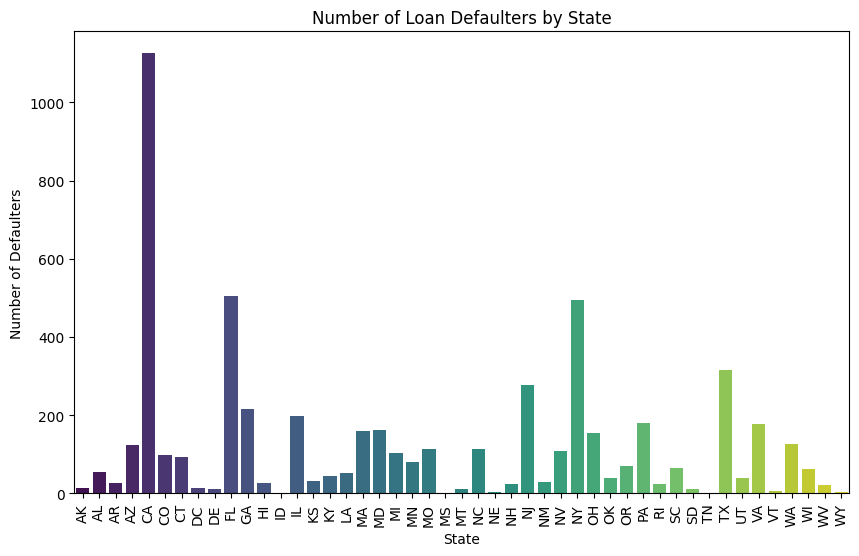

In [30]:
# Getting only defaulters from data frame
defaulters = df[df['loan_status'] == 'Charged Off']

# Group by state and count defaulters
default_counts = defaulters.groupby('addr_state').size().reset_index(name='DefaulterCount')

# Plotting between no of defaulters and state
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='addr_state', y='DefaulterCount', palette='viridis')
plt.title('Number of Loan Defaulters by State')
plt.xlabel('State')
plt.ylabel('Number of Defaulters')
plt.xticks(rotation=90)
plt.show()

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/4247271654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='purpose', y='DefaulterCount', palette='viridis')


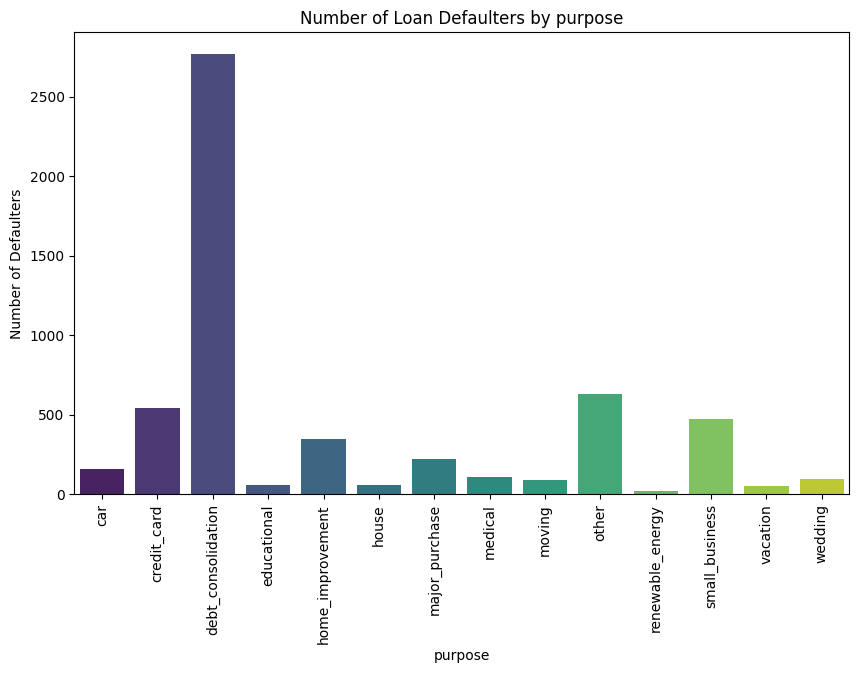

In [31]:
# Group by purpose and count defaulters
default_counts = defaulters.groupby('purpose').size().reset_index(name='DefaulterCount')

# Plotting bar diagram between purpose and defaulters
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='purpose', y='DefaulterCount', palette='viridis')
plt.title('Number of Loan Defaulters by purpose')
plt.xlabel('purpose')
plt.ylabel('Number of Defaulters')
plt.xticks(rotation=90)
plt.show()

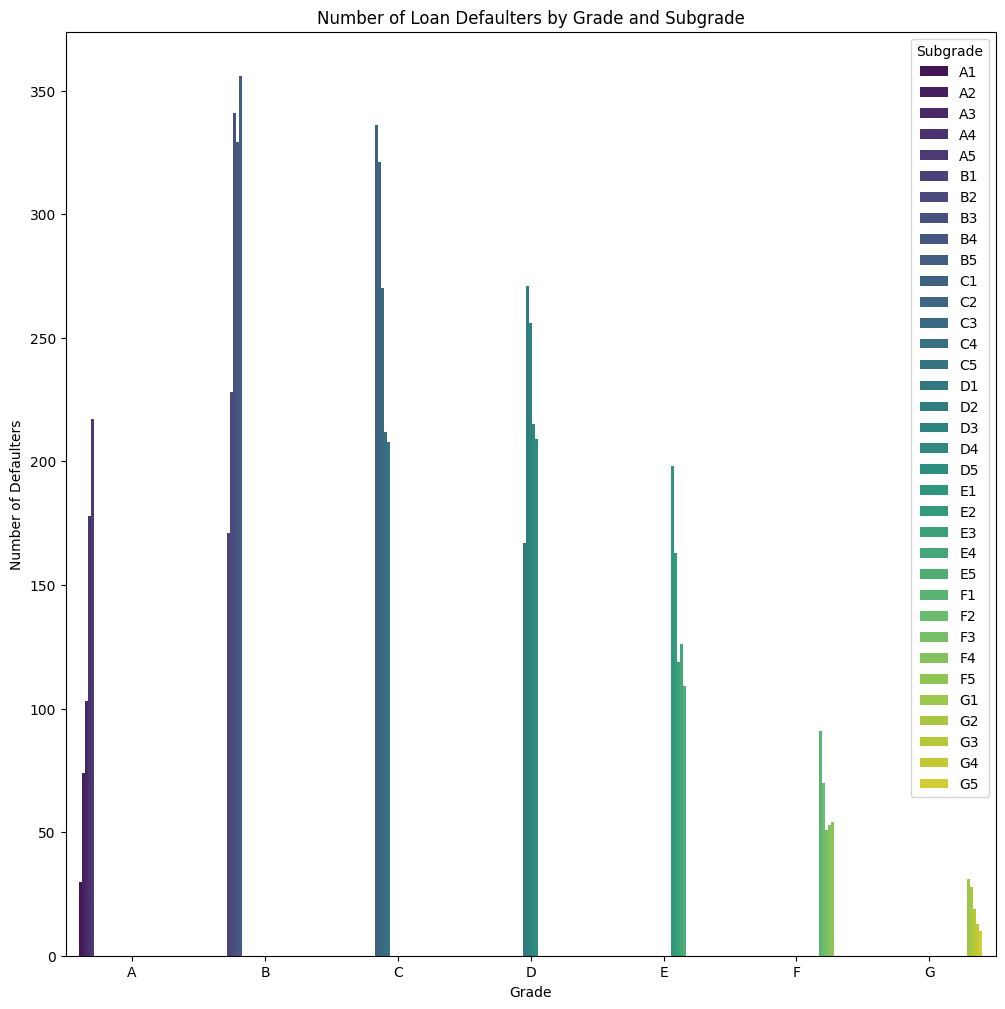

In [32]:
# Group by grade and subgrade and count defaulters
default_counts = defaulters.groupby(['grade', 'sub_grade']).size().reset_index(name='DefaulterCount')

# Plotting bar plot with small gaps between sub bars
plt.figure(figsize=(12, 12))
sns.barplot(data=default_counts, x='grade', y='DefaulterCount', hue='sub_grade', palette='viridis', dodge=True)
plt.title('Number of Loan Defaulters by Grade and Subgrade')
plt.xlabel('Grade')
plt.ylabel('Number of Defaulters')
plt.legend(title='Subgrade')
plt.show()

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/569608562.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='term', y='DefaulterCount', palette='viridis')


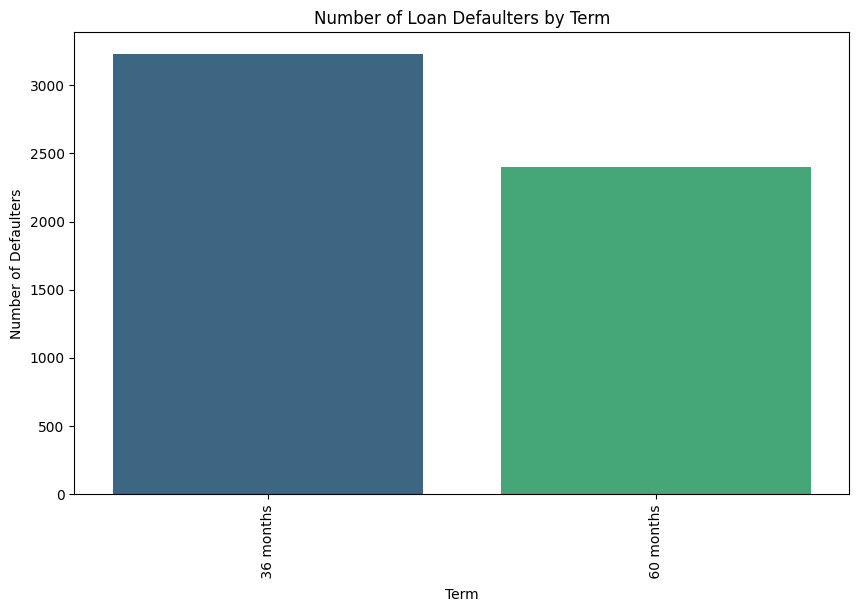

In [33]:
# Group by state and count defaulters
default_counts = defaulters.groupby('term').size().reset_index(name='DefaulterCount')

# Plotting between no of defaulters and state
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='term', y='DefaulterCount', palette='viridis')
plt.title('Number of Loan Defaulters by Term')
plt.xlabel('Term')
plt.ylabel('Number of Defaulters')
plt.xticks(rotation=90)
plt.show()

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/3621088234.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='DTI_Bucket', y='NoOfDefaults', palette='viridis')


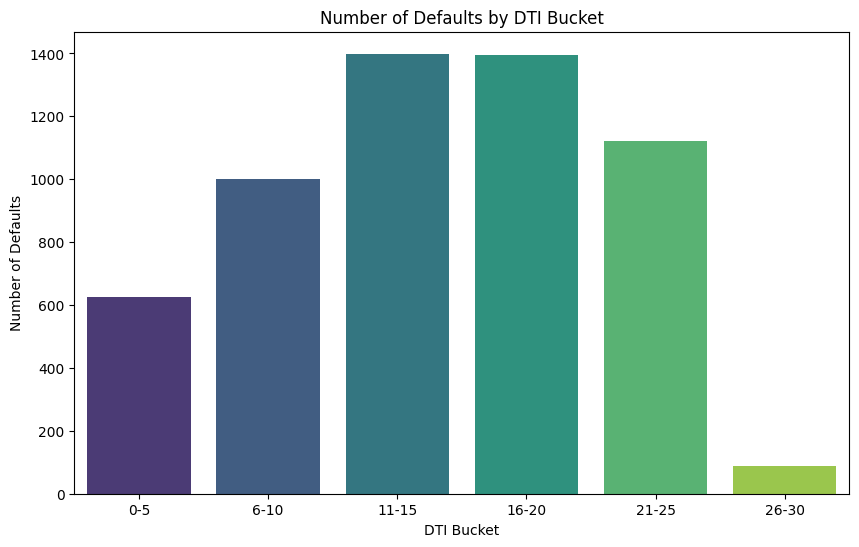

In [34]:
# Define DTI bins
bins = [0, 5, 10, 15, 20, 25, 30]

# Assign labels for the bins
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']

# Bin the DTI values
df['DTI_Bucket'] = pd.cut(df['dti'], bins=bins, labels=labels, right=False)

# Filter for defaulters
defaulters = df[df['loan_status'] == 'Charged Off']

# Count defaults in each DTI bucket
default_counts = defaulters['DTI_Bucket'].value_counts().reset_index()
default_counts.columns = ['DTI_Bucket', 'NoOfDefaults']

# Sort by DTI buckets
default_counts = default_counts.sort_values(by='DTI_Bucket')

# Plotting bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='DTI_Bucket', y='NoOfDefaults', palette='viridis')
plt.title('Number of Defaults by DTI Bucket')
plt.xlabel('DTI Bucket')
plt.ylabel('Number of Defaults')
plt.show()

In [35]:
df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Unknown      1075
Name: count, dtype: int64

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/2605355099.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='emp_length', y='NoOfDefaults', palette='viridis')


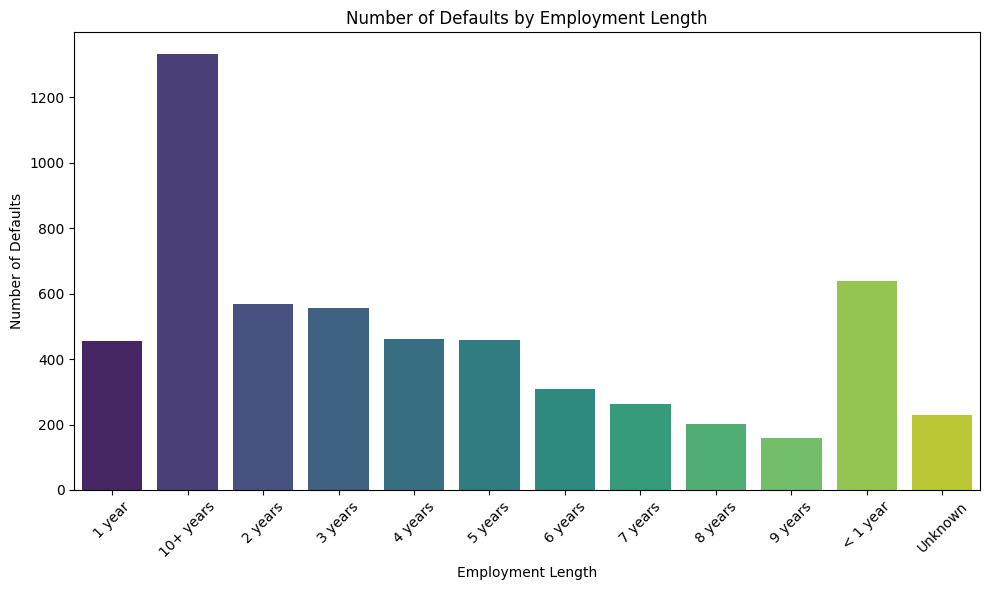

In [36]:
# Count defaults in each employment length category
default_counts = defaulters['emp_length'].value_counts().reset_index()
default_counts.columns = ['emp_length', 'NoOfDefaults']

# Sort by EmploymentLength (optional, but recommended for categorical plots)
default_counts = default_counts.sort_values(by='emp_length')

# Plotting bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='emp_length', y='NoOfDefaults', palette='viridis')
plt.title('Number of Defaults by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Number of Defaults')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/3312526510.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='home_ownership', y='NoOfDefaults', palette='viridis')


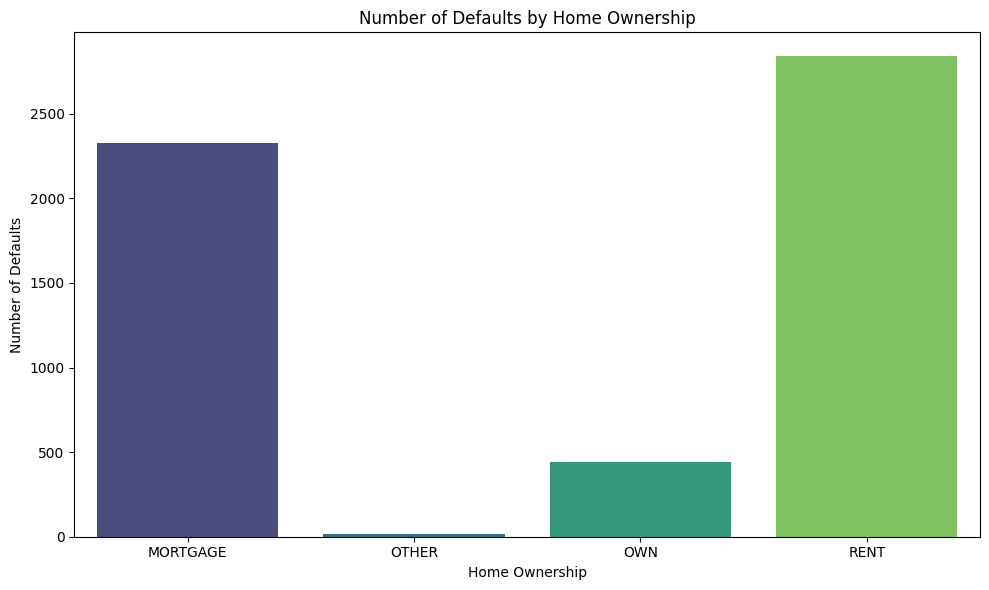

In [37]:
# Count defaults in each home ownership category
default_counts = defaulters['home_ownership'].value_counts().reset_index()
default_counts.columns = ['home_ownership', 'NoOfDefaults']

# Sort by HomeOwnership (optional, but recommended for categorical plots)
default_counts = default_counts.sort_values(by='home_ownership')

# Plotting bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='home_ownership', y='NoOfDefaults', palette='viridis')
plt.title('Number of Defaults by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Defaults')
plt.tight_layout()
plt.show()

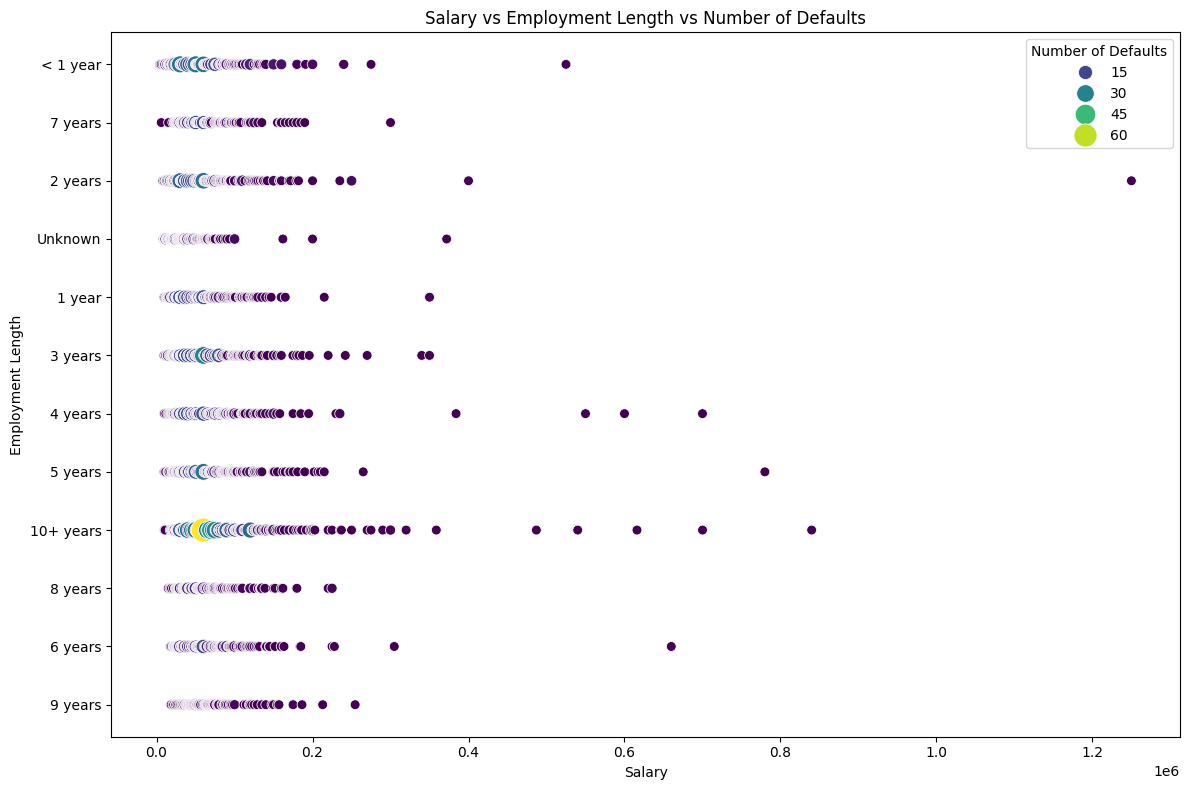

In [38]:
# Group by Salary and EmploymentLength, count defaults
default_counts = defaulters.groupby(['annual_inc', 'emp_length']).size().reset_index(name='NoOfDefaults')

# Plotting scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=default_counts, x='annual_inc', y='emp_length', size='NoOfDefaults', sizes=(50, 300), hue='NoOfDefaults', palette='viridis', legend='auto')
plt.title('Salary vs Employment Length vs Number of Defaults')
plt.xlabel('Salary')
plt.ylabel('Employment Length')
plt.legend(title='Number of Defaults')
plt.tight_layout()
plt.show()

In [39]:
df.annual_inc<200000

0         True
1         True
2         True
3         True
4         True
         ...  
39712     True
39713     True
39714     True
39715    False
39716     True
Name: annual_inc, Length: 39717, dtype: bool

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/1505109904.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fullypaid_counts, x='addr_state', y='fullypaid', palette='viridis')


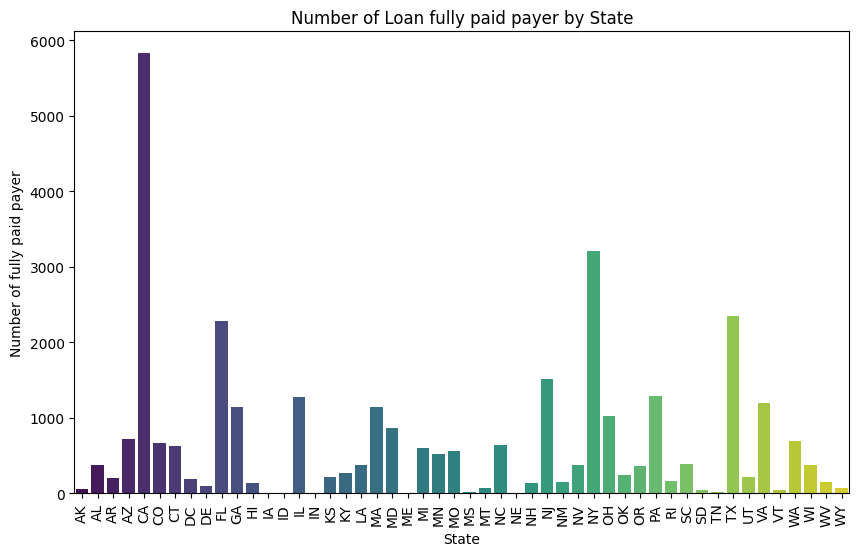

In [40]:
# Getting only defaulters from data frame
fullypaid = df[df['loan_status'] == 'Fully Paid']

# Group by state and count defaulters
fullypaid_counts = fullypaid.groupby('addr_state').size().reset_index(name='fullypaid')

# Plotting between no of defaulters and state
plt.figure(figsize=(10, 6))
sns.barplot(data=fullypaid_counts, x='addr_state', y='fullypaid', palette='viridis')
plt.title('Number of Loan fully paid payer by State')
plt.xlabel('State')
plt.ylabel('Number of fully paid payer')
plt.xticks(rotation=90)
plt.show()

In [41]:
df['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/3358862829.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='purpose', y='DefaulterCount', palette='viridis')


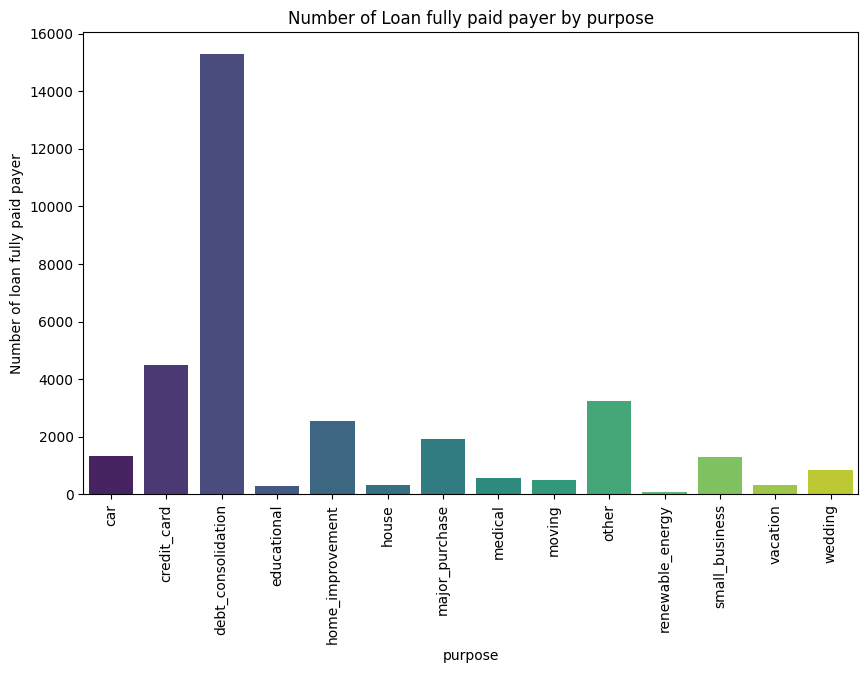

In [42]:
# Group by purpose and count defaulters
default_counts = fullypaid.groupby('purpose').size().reset_index(name='DefaulterCount')

# Plotting bar diagram between purpose and defaulters
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='purpose', y='DefaulterCount', palette='viridis')
plt.title('Number of Loan fully paid payer by purpose')
plt.xlabel('purpose')
plt.ylabel('Number of loan fully paid payer')
plt.xticks(rotation=90)
plt.show()

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/3358862829.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='purpose', y='DefaulterCount', palette='viridis')


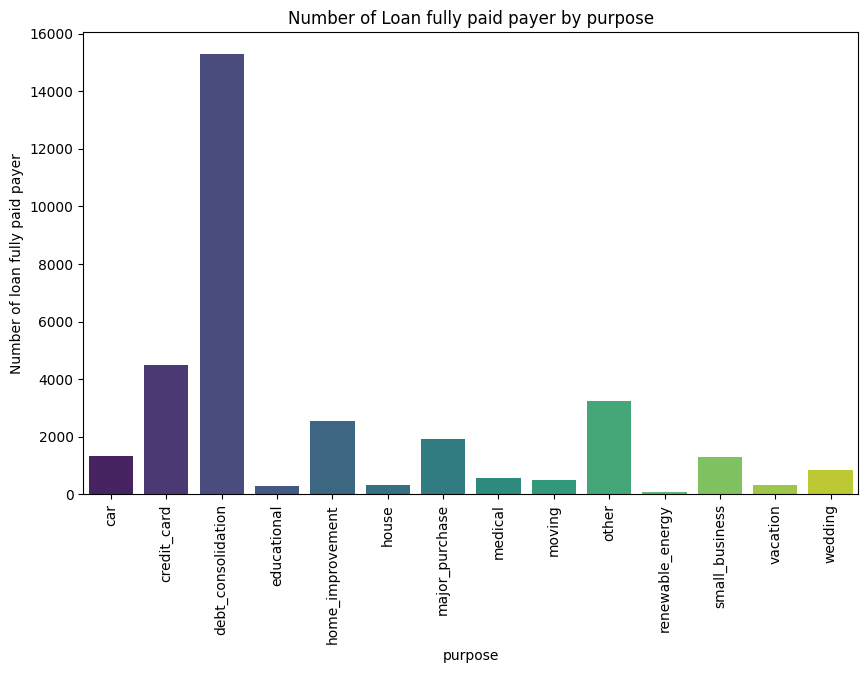

In [43]:
# Group by purpose and count defaulters
default_counts = fullypaid.groupby('purpose').size().reset_index(name='DefaulterCount')

# Plotting bar diagram between purpose and defaulters
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='purpose', y='DefaulterCount', palette='viridis')
plt.title('Number of Loan fully paid payer by purpose')
plt.xlabel('purpose')
plt.ylabel('Number of loan fully paid payer')
plt.xticks(rotation=90)
plt.show()

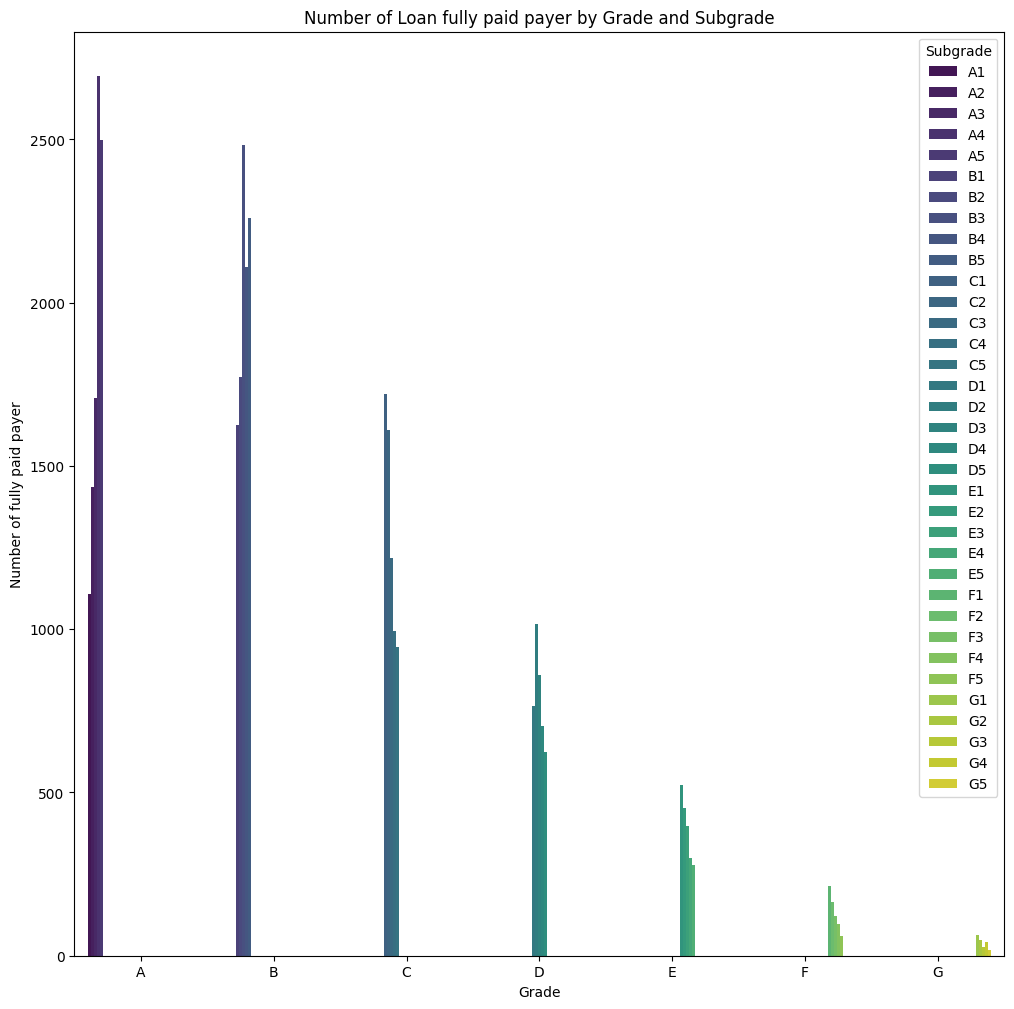

In [44]:
# Group by grade and subgrade and count defaulters
default_counts = fullypaid.groupby(['grade', 'sub_grade']).size().reset_index(name='DefaulterCount')

# Plotting bar plot with small gaps between sub bars
plt.figure(figsize=(12, 12))
sns.barplot(data=default_counts, x='grade', y='DefaulterCount', hue='sub_grade', palette='viridis', dodge=True)
plt.title('Number of Loan fully paid payer by Grade and Subgrade')
plt.xlabel('Grade')
plt.ylabel('Number of fully paid payer')
plt.legend(title='Subgrade')
plt.show()

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/3485300984.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='term', y='DefaulterCount', palette='viridis')


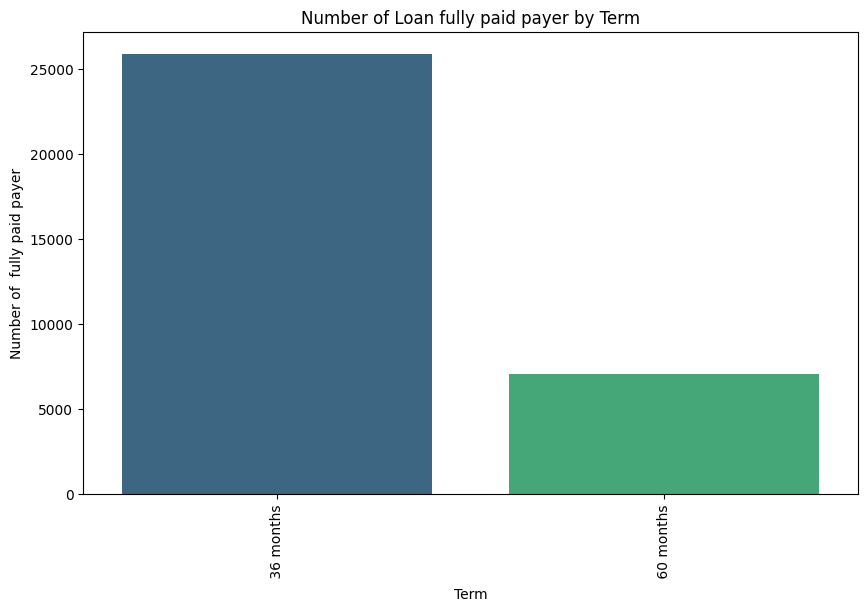

In [45]:
# Group by state and count defaulters
default_counts = fullypaid.groupby('term').size().reset_index(name='DefaulterCount')

# Plotting between no of defaulters and state
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='term', y='DefaulterCount', palette='viridis')
plt.title('Number of Loan fully paid payer by Term')
plt.xlabel('Term')
plt.ylabel('Number of  fully paid payer')
plt.xticks(rotation=90)
plt.show()

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/429153112.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='DTI_Bucket', y='NoOfDefaults', palette='viridis')


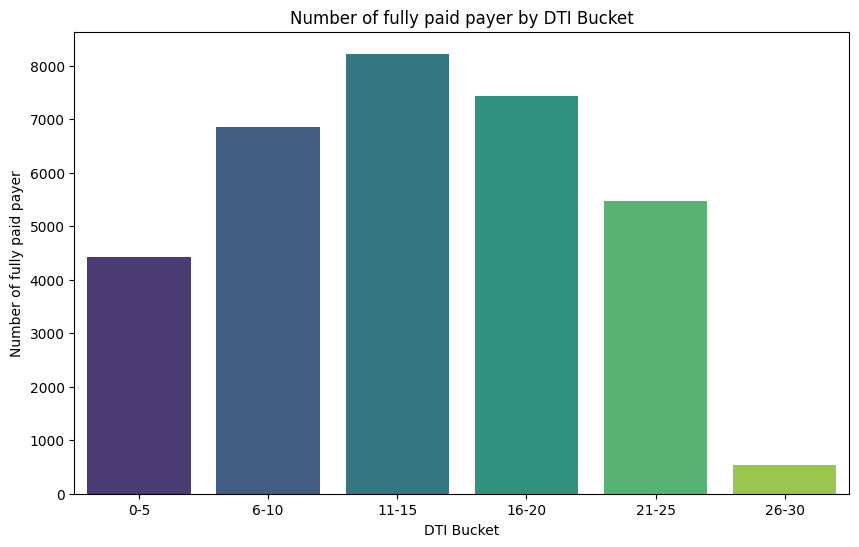

In [46]:
# Define DTI bins
bins = [0, 5, 10, 15, 20, 25, 30]

# Assign labels for the bins
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']

# Bin the DTI values
df['DTI_Bucket'] = pd.cut(df['dti'], bins=bins, labels=labels, right=False)

# Filter for defaulters
fullypaid = df[df['loan_status'] == 'Fully Paid']

# Count defaults in each DTI bucket
default_counts = fullypaid['DTI_Bucket'].value_counts().reset_index()
default_counts.columns = ['DTI_Bucket', 'NoOfDefaults']

# Sort by DTI buckets
default_counts = default_counts.sort_values(by='DTI_Bucket')

# Plotting bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='DTI_Bucket', y='NoOfDefaults', palette='viridis')
plt.title('Number of fully paid payer by DTI Bucket')
plt.xlabel('DTI Bucket')
plt.ylabel('Number of fully paid payer')
plt.show()

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/684762024.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='emp_length', y='NoOfDefaults', palette='viridis')


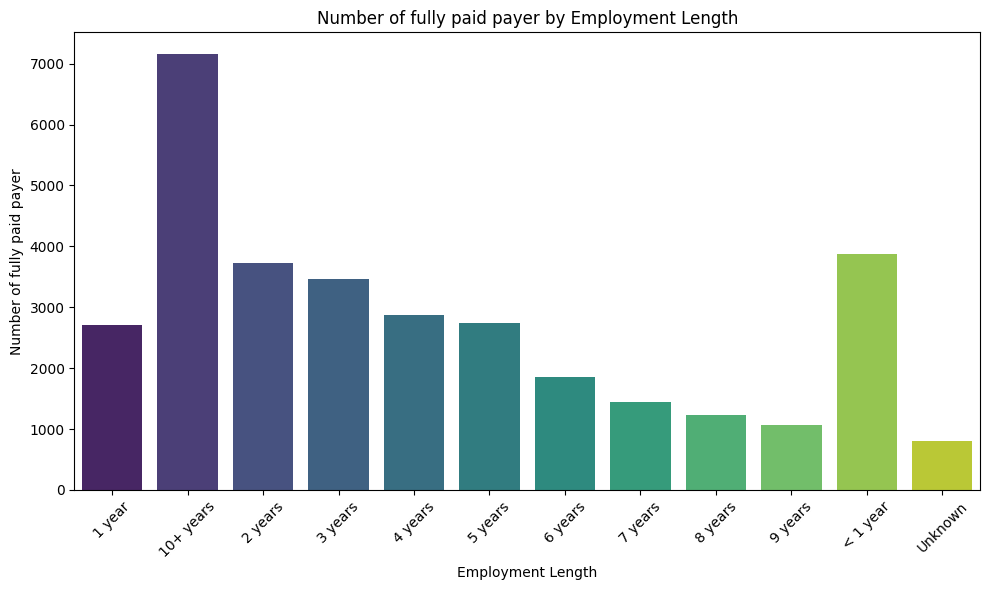

In [47]:
# Count defaults in each employment length category
default_counts = fullypaid['emp_length'].value_counts().reset_index()
default_counts.columns = ['emp_length', 'NoOfDefaults']

# Sort by EmploymentLength (optional, but recommended for categorical plots)
default_counts = default_counts.sort_values(by='emp_length')

# Plotting bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='emp_length', y='NoOfDefaults', palette='viridis')
plt.title('Number of fully paid payer by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Number of fully paid payer')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/1444978475.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='home_ownership', y='NoOfDefaults', palette='viridis')


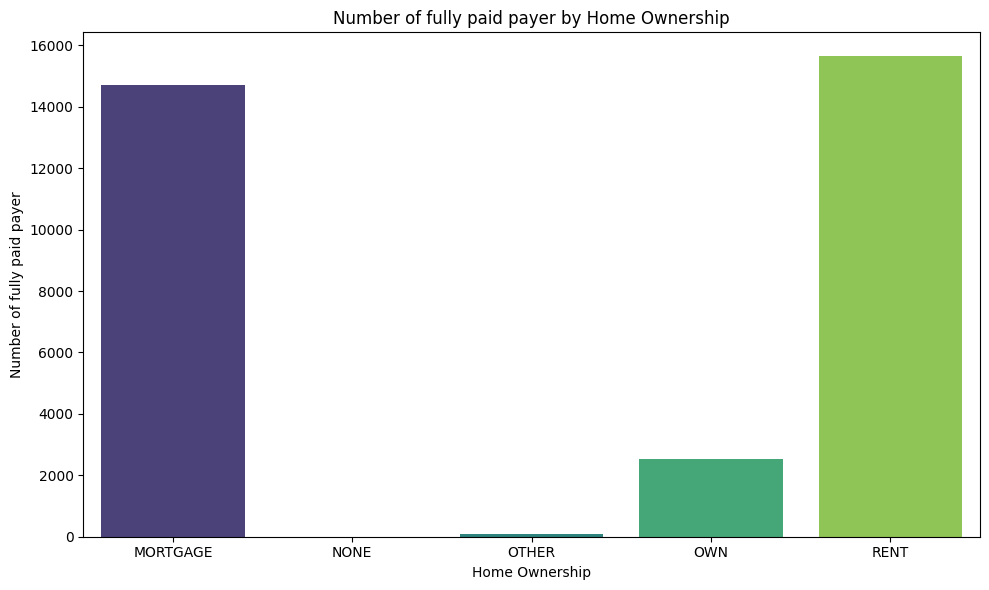

In [48]:
# Count defaults in each home ownership category
default_counts = fullypaid['home_ownership'].value_counts().reset_index()
default_counts.columns = ['home_ownership', 'NoOfDefaults']

# Sort by HomeOwnership (optional, but recommended for categorical plots)
default_counts = default_counts.sort_values(by='home_ownership')

# Plotting bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='home_ownership', y='NoOfDefaults', palette='viridis')
plt.title('Number of fully paid payer by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Number of fully paid payer')
plt.tight_layout()
plt.show()

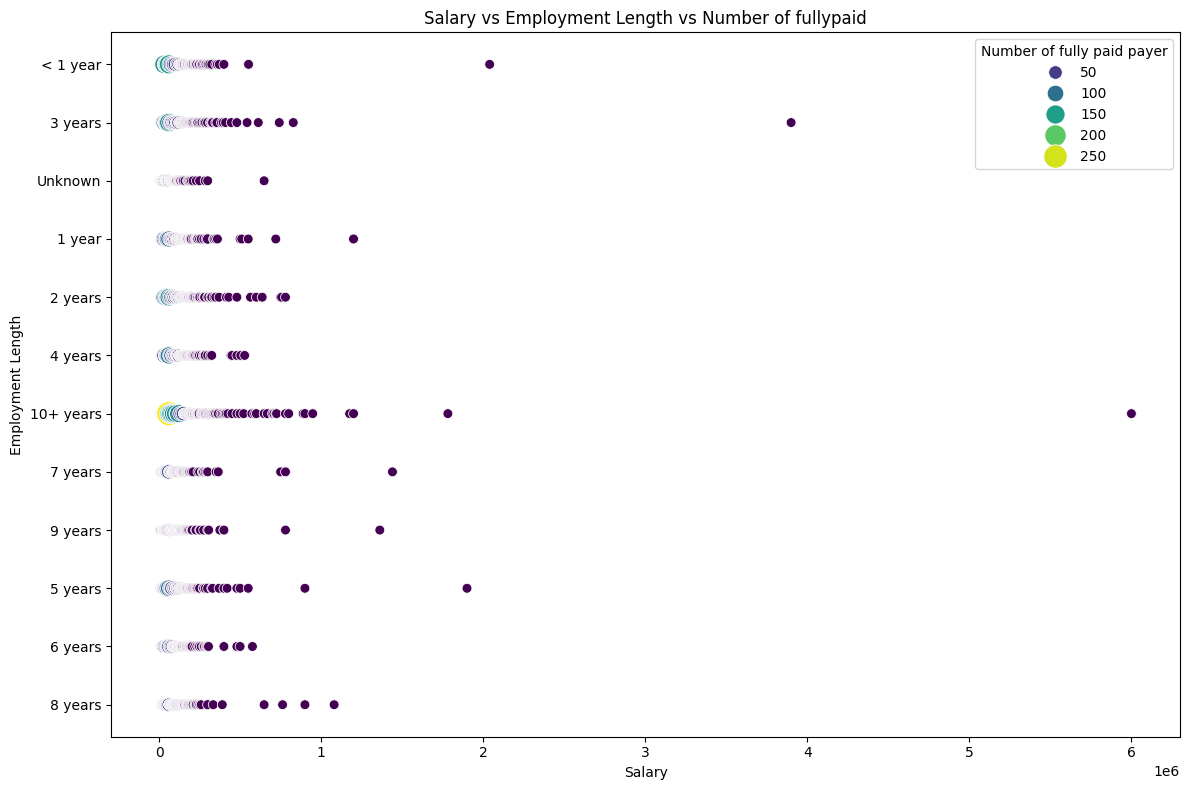

In [49]:
# Group by Salary and EmploymentLength, count defaults
default_counts = fullypaid.groupby(['annual_inc', 'emp_length']).size().reset_index(name='NoOfDefaults')

# Plotting scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=default_counts, x='annual_inc', y='emp_length', size='NoOfDefaults', sizes=(50, 300), hue='NoOfDefaults', palette='viridis', legend='auto')
plt.title('Salary vs Employment Length vs Number of fullypaid')
plt.xlabel('Salary')
plt.ylabel('Employment Length')
plt.legend(title='Number of fully paid payer')
plt.tight_layout()
plt.show()

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/1284856276.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fullypaid_counts, x='addr_state', y='fullypaid', palette='viridis')


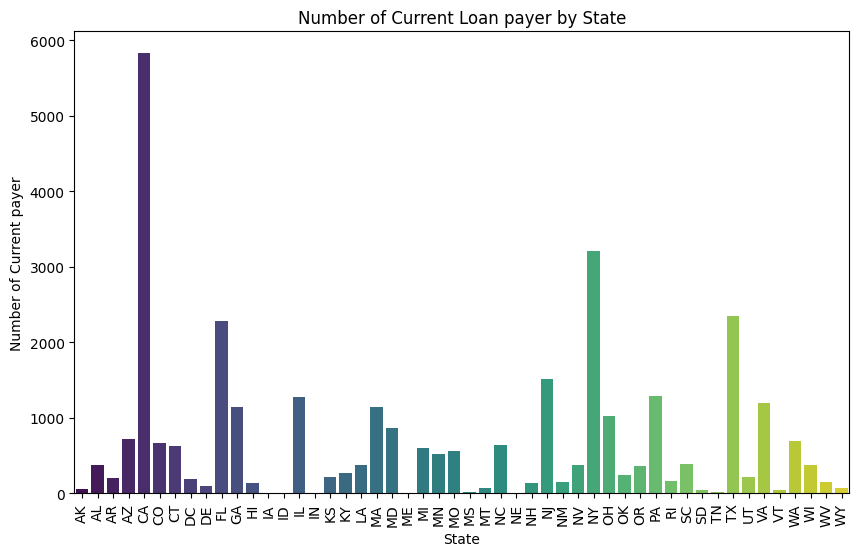

In [50]:
# Getting only defaulters from data frame
Currentpayer = df[df['loan_status'] == 'Current']

# Group by state and count defaulters
current_counts = Currentpayer.groupby('addr_state').size().reset_index(name='Current')

# Plotting between no of defaulters and state
plt.figure(figsize=(10, 6))
sns.barplot(data=fullypaid_counts, x='addr_state', y='fullypaid', palette='viridis')
plt.title('Number of Current Loan payer by State')
plt.xlabel('State')
plt.ylabel('Number of Current payer')
plt.xticks(rotation=90)
plt.show()

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/3603508008.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='purpose', y='DefaulterCount', palette='viridis')


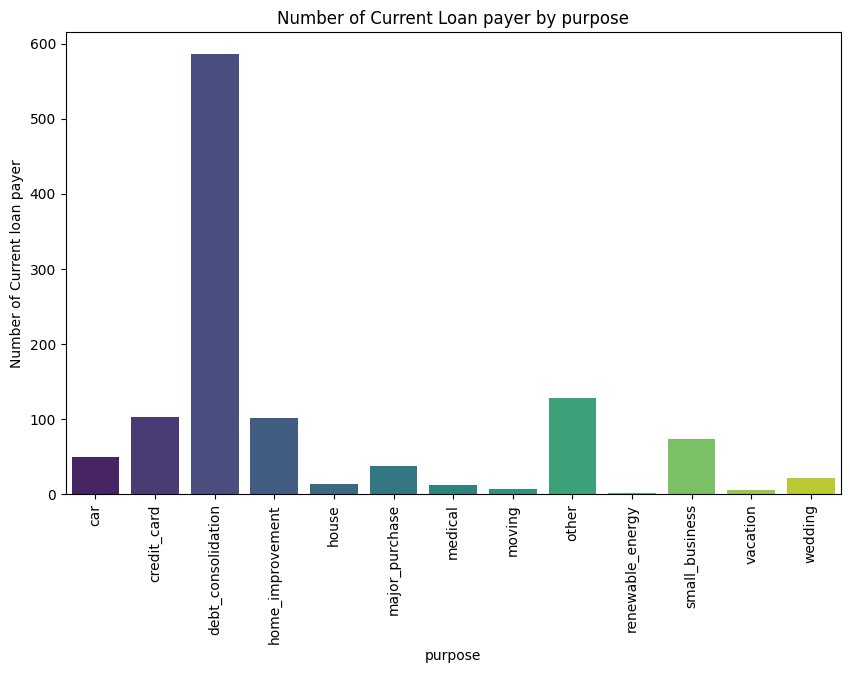

In [51]:
# Group by purpose and count defaulters
default_counts = Currentpayer.groupby('purpose').size().reset_index(name='DefaulterCount')

# Plotting bar diagram between purpose and defaulters
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='purpose', y='DefaulterCount', palette='viridis')
plt.title('Number of Current Loan payer by purpose')
plt.xlabel('purpose')
plt.ylabel('Number of Current loan payer')
plt.xticks(rotation=90)
plt.show()

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/3603508008.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='purpose', y='DefaulterCount', palette='viridis')


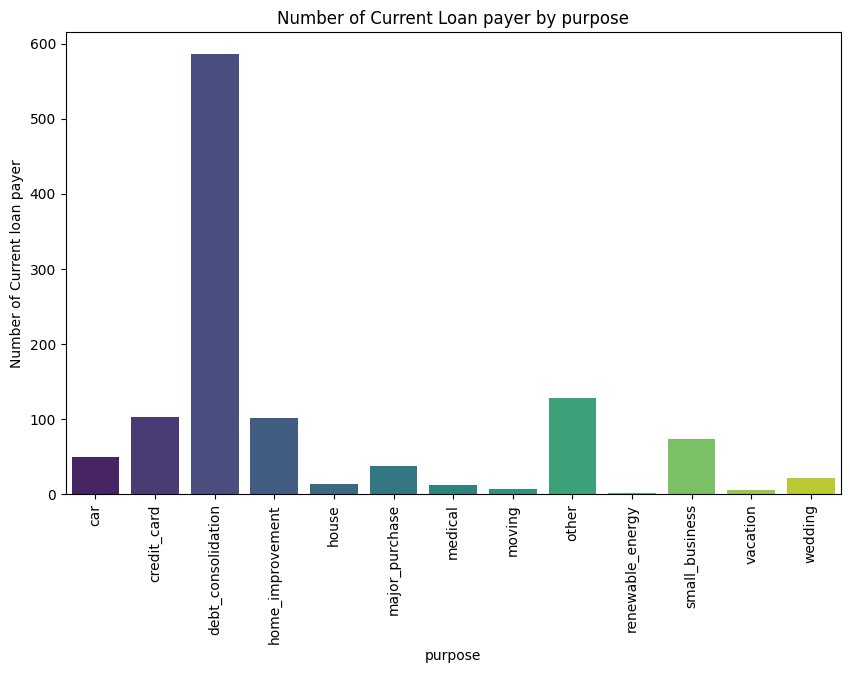

In [52]:
# Group by purpose and count defaulters
default_counts = Currentpayer.groupby('purpose').size().reset_index(name='DefaulterCount')

# Plotting bar diagram between purpose and defaulters
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='purpose', y='DefaulterCount', palette='viridis')
plt.title('Number of Current Loan payer by purpose')
plt.xlabel('purpose')
plt.ylabel('Number of Current loan payer')
plt.xticks(rotation=90)
plt.show()

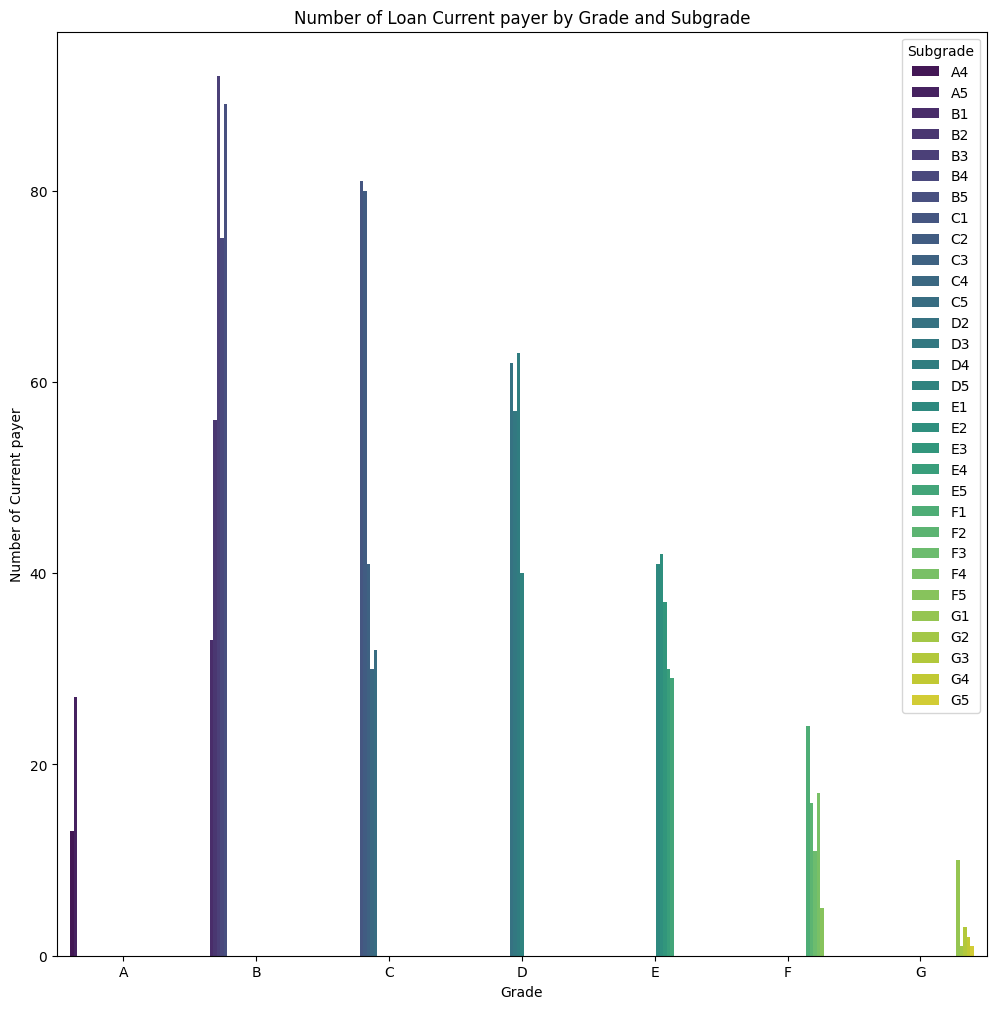

In [53]:
# Group by grade and subgrade and count defaulters
default_counts = Currentpayer.groupby(['grade', 'sub_grade']).size().reset_index(name='DefaulterCount')

# Plotting bar plot with small gaps between sub bars
plt.figure(figsize=(12, 12))
sns.barplot(data=default_counts, x='grade', y='DefaulterCount', hue='sub_grade', palette='viridis', dodge=True)
plt.title('Number of Loan Current payer by Grade and Subgrade')
plt.xlabel('Grade')
plt.ylabel('Number of Current payer')
plt.legend(title='Subgrade')
plt.show()

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/2373599110.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='term', y='DefaulterCount', palette='viridis')


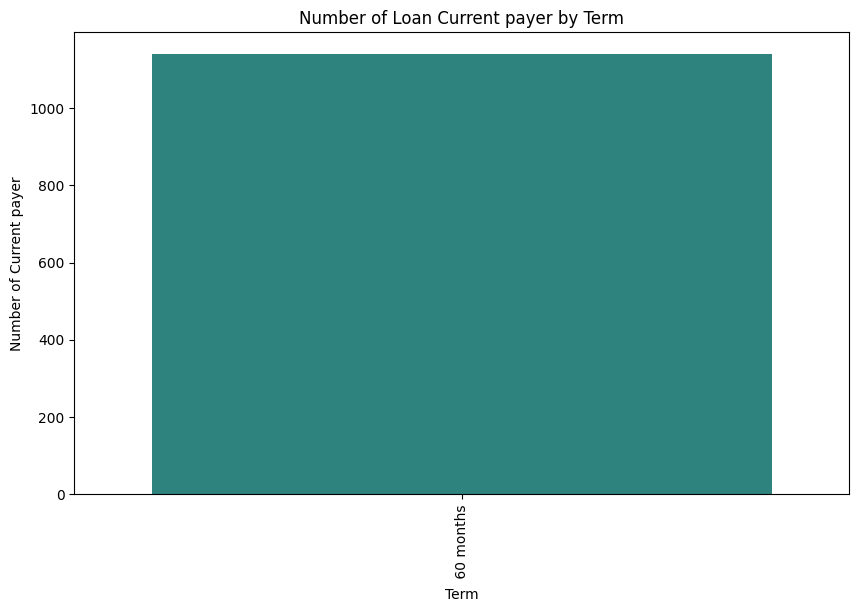

In [54]:
# Group by state and count defaulters
default_counts = Currentpayer.groupby('term').size().reset_index(name='DefaulterCount')

# Plotting between no of defaulters and state
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='term', y='DefaulterCount', palette='viridis')
plt.title('Number of Loan Current payer by Term')
plt.xlabel('Term')
plt.ylabel('Number of Current payer')
plt.xticks(rotation=90)
plt.show()

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/1841263512.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='DTI_Bucket', y='NoOfDefaults', palette='viridis')


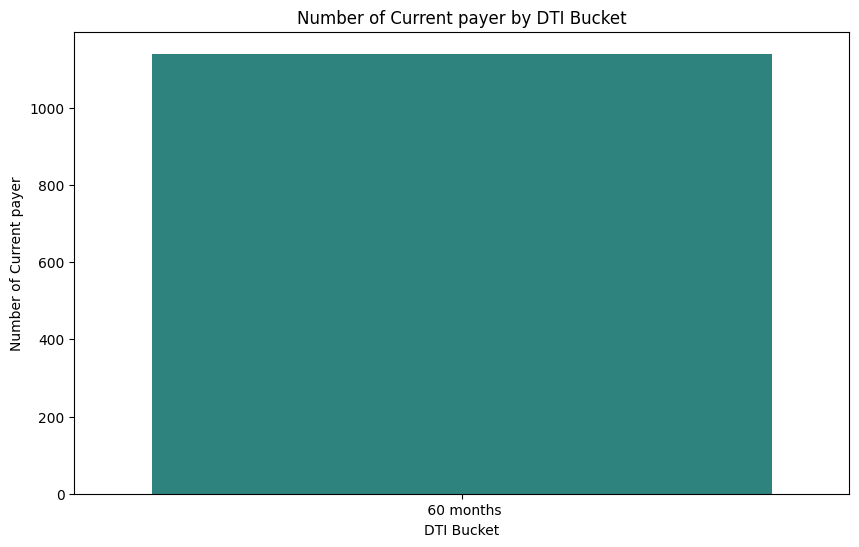

In [55]:
# Define DTI bins
bins = [0, 5, 10, 15, 20, 25, 30]

# Assign labels for the bins
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']

# Bin the DTI values
df['DTI_Bucket'] = pd.cut(df['dti'], bins=bins, labels=labels, right=False)

# Filter for defaulters
Currentpayer = df[df['loan_status'] == 'Current']

default_counts.columns = ['DTI_Bucket', 'NoOfDefaults']

# Sort by DTI buckets
default_counts = default_counts.sort_values(by='DTI_Bucket')

# Plotting bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='DTI_Bucket', y='NoOfDefaults', palette='viridis')
plt.title('Number of Current payer by DTI Bucket')
plt.xlabel('DTI Bucket')
plt.ylabel('Number of Current payer')
plt.show()

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/1916983748.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='emp_length', y='NoOfDefaults', palette='viridis')


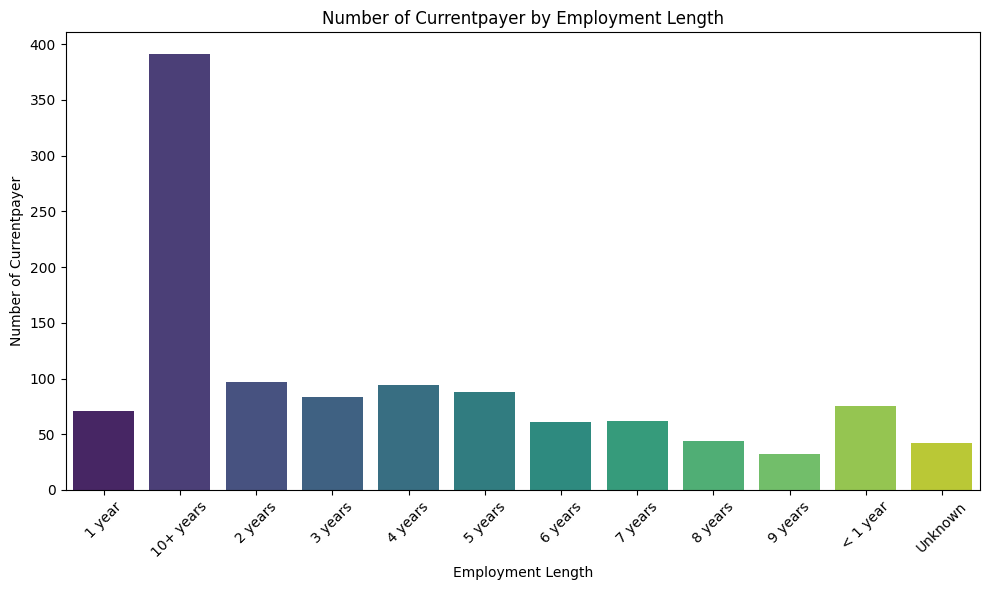

In [56]:
# Count defaults in each employment length category
default_counts = Currentpayer['emp_length'].value_counts().reset_index()
default_counts.columns = ['emp_length', 'NoOfDefaults']

# Sort by EmploymentLength (optional, but recommended for categorical plots)
default_counts = default_counts.sort_values(by='emp_length')

# Plotting bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='emp_length', y='NoOfDefaults', palette='viridis')
plt.title('Number of Currentpayer by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Number of Currentpayer')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

/var/folders/0n/jsylxfjx0kd7s3qbyqhp6j5m0000gn/T/ipykernel_49110/1225244289.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_counts, x='home_ownership', y='NoOfDefaults', palette='viridis')


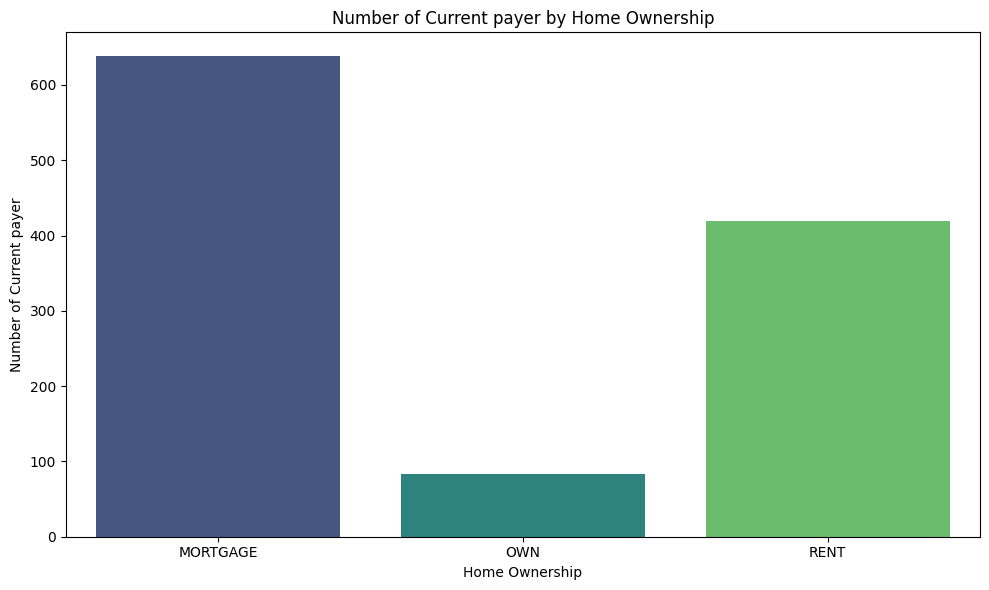

In [57]:
# Count defaults in each home ownership category
default_counts = Currentpayer['home_ownership'].value_counts().reset_index()
default_counts.columns = ['home_ownership', 'NoOfDefaults']

# Sort by HomeOwnership (optional, but recommended for categorical plots)
default_counts = default_counts.sort_values(by='home_ownership')

# Plotting bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=default_counts, x='home_ownership', y='NoOfDefaults', palette='viridis')
plt.title('Number of Current payer by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Current payer')
plt.tight_layout()
plt.show()

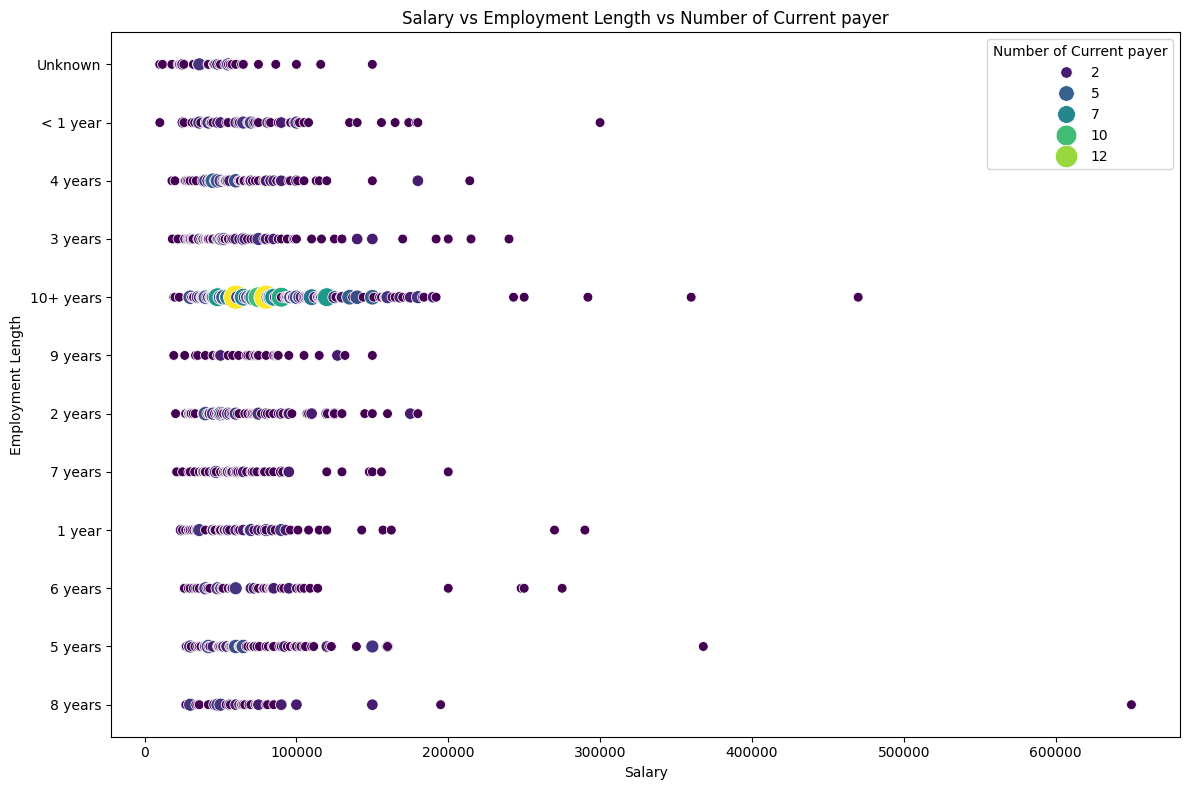

In [58]:
# Group by Salary and EmploymentLength, count defaults
default_counts = Currentpayer.groupby(['annual_inc', 'emp_length']).size().reset_index(name='NoOfDefaults')

# Plotting scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=default_counts, x='annual_inc', y='emp_length', size='NoOfDefaults', sizes=(50, 300), hue='NoOfDefaults', palette='viridis', legend='auto')
plt.title('Salary vs Employment Length vs Number of Current payer')
plt.xlabel('Salary')
plt.ylabel('Employment Length')
plt.legend(title='Number of Current payer')
plt.tight_layout()
plt.show()